#### Review and tutorial of 

# Deep Neural Networks as Gaussian Processes 
Jaehoon Lee, Yasaman Bahri, Roman Novak , Samuel S. Schoenholz, Jeffrey Pennington, Jascha Sohl-Dickstein
  
#### Presented by  
[Jason Deng](mailto:dengzj@Hotmail.com)  
[Alexander Dubitskiy](mailto:ald028@g.harvard.edu)  
[Zheng Yang](mailto:zhengyang@g.harvard.edu)  
[Sean Tierney](mailto:set936@g.harvard.edu) 

#### Background information

The question of defining meaningful priors for a neural network was first addressed by Radford M. Neal in his 1994 paper [Priors for infinite networks](ftp://www.cs.toronto.edu/dist/radford/pin.pdf).  
In the paper he studied a neural network with a real valued input of size I, one hidden layer of size H with sigmoidal transfer function and real valued output of size O. This network can be described with the following equations:
$$ f_k(x) = b_k + \sum_{i=1}^{H} v_{jk} h_j(x) $$ 
$$ h_j(x) = tanh( a_j + \sum_{i=1}^{I} u_{ij} x_i) $$

The author suggested Gaussian priors over the network weights $ b_k \propto \mathcal{N}(0, \sigma_b) , v_{jk} \propto \mathcal{N}(0, \sigma_v), a_j \propto \mathcal{N}(0, \sigma_a) , u_{ij} \propto \mathcal{N}(0, \sigma_u) $ and showed that when $H \to \infty$ the prior joint distribution converges to a multivariate Gaussian with zero means and covarinace:
  
$$ E[f_k(x) f_k(x\prime)]  = \sigma_{b}^2 + \sum_{j} \sigma_{v}^2 E[h_{j}(x)h_{j}(x \prime)] = \sigma_{b}^2 + w_{v}^2 C(x, x \prime) $$
and this is a Gaussian process.

This work was further extended by Christopher K. I. Williams in his 1996 paper [Computing with infinite networks](https://papers.nips.cc/paper/1197-computing-with-infinite-networks.pdf).  
Williams showed how to calculate the corresponding kernels for single-layered neural networks with sigmoidal and Gaussian transfer functions.  
  
$$ C_{erf}(x, x \prime) = \frac{2}{\pi} \sin^{-1} \frac{2 x^{T} \Sigma x \prime }{\sqrt{(1 + 2 x^{T} \Sigma x ) (1 + 2 x \prime^{T} \Sigma x \prime )}} $$
  
$$ C_{G}(x, x \prime) = (\frac{\sigma_e}{\sigma_u})^d \exp(- \frac{x^{T}x}{2 \sigma_{m}^2}) \exp(- \frac{(x - x^{T})^{T} (x - x^{T})}{2 \sigma_{s}^2}) \exp(- \frac{x \prime^{T}x \prime}{2 \sigma_{m}^2}) $$  
where 
$$ \frac{1}{\sigma_{e}^2} = \frac{2}{\sigma_{g}^2} + \frac{1}{\sigma_{u}^2} , \sigma_{s}^2 = 2 \sigma_{g}^2 + \frac{\sigma_{g}^4}{\sigma_{u}^2} , \sigma_{m}^2 = 2 \sigma_{u}^2 + \sigma_{g}^2 $$  
and $ \sigma_{g} $ is the width of the Gaussian transfer function. 

####  Summary of the kernel computation for a multi-layer neural network.

Consider an $L$-hidden-layer fully-connected neural network with hidden layers of width $N_l$ (for layer $l$) and pointwise nonlinearities $\phi$. Let $x \in \Re^{d_{in}}$ denote the input to the network, and let $z^L \in \Re^{d_{out}}$ denote it output. The $i$th component of activations in the $l$th layer, post-nonlinearity and post-affine trnsformatin, are denoted $x_i^l$ and $z_i^l$ repectively. Weight and bias parameters for the $l$th layer have components $W_{ij}^l, b_i^l$, which are independent and randomly drawn, and we take them all to have zero mean and variances $\sigma_w^2/N_l$ and $\sigma_b^2$, repectively. $GP(\mu, K)$ denotes a Gaussian process with mean and covariance functions $\mu(\cdotp), K(\cdotp, \cdotp)$, repectively.  

Let's review the multidimentional Central Limit Theorem first.  

We assume each infdividual $X_i$ is a random vector in $\Re^k$, with mean vector $\mu  = E(X_i)$ and these random vectors are i.i.d.,  
$$\frac{1}{n}\Sigma^n_{i = 1}X_i = 
\frac{1}{n}
\begin{bmatrix}
    \Sigma^n_{i = 1}X_{i(1)}\\
    \vdots \\
    \Sigma^n_{i = 1}X_{i(k)}
\end{bmatrix}
 = \bar{X_n}$$
And therefore, 
$$\frac{1}{\sqrt{n}}\Sigma^n_{i = 1}[X_i - E(X_i)] = \frac{1}{\sqrt{n}}\Sigma^n_{i = 1}(X_i - \mu) = \sqrt{n}(\bar{X_n} - \mu).$$  

The multidimentional Central Limit Theorem states that
$$\sqrt{n}(\bar{X_n} - \mu) \sim N_k(0, \Sigma)$$  

In a multi-layer neural network, the weights and bias parameters are taken to be i.i.d., and the post-activations $x_j^l, x_{j'}^l$, are independent for $j \neq j'$. From the multidimentional Center Limit Theorem, as $N_l \rightarrow \infty$, any finite collection of $\{z_i^l(x^{\alpha=1}), \ldots, z_i^l(x^{\alpha=k})\}$ will have a joint multivariate Guassian distribution and $z_i^l \sim GP(0, K^l).$  

The covariance is 
$$K^l(x, x') \equiv E[z^l_i(x)z^l_i(x')] = \sigma^2_b + \sigma^2_wE_{z_i^{l-1}\sim GP(0, K^{l-1})}[\phi(z_i^{l-1}(x))\phi(z_i^{l-1}(x'))].$$  

Since the expectation in above equation is over the GP governing $z_i^{l-1}$, which is equivalent to integrating against the joint distribution of only $z_i^{l-1}(x)$ and $z_i^{l-1}(x')$. This joint distirbution has zero mean and covariance matrix 
$$K = 
\begin{bmatrix}
    K^{l-1}(x, x) & K^{l-1}(x, x')\\
     K^{l-1}(x', x) &  K^{l-1}(x', x') \\
\end{bmatrix}$$  

Thus, we can introduce the shorthand
$$K^l(x, x') = \sigma^2_b + \sigma^2_wF_\phi(K^{l-1}(x, x'), K^{l-1}(x, x), K^{l-1}(x', x'))$$
to emphasize the recursive relationship between $K^l$ and $K^{l-1}$ via a deterministic function F whose form depends only on the nonlinearity $\phi$. This gives an iterative series of computations which can be performed to obtain $K^L$ for the GP describing the network's final output.

For the base case $K^0$, suppose $W^0_{ij} \sim N(0, \sigma^2_x/d_{in}), b_j^0 \sim N(0, \sigma_b^2)$; we can utilize the recursion relating $K^1$ and $K^0$, where
$$K^0(x, x') = E[z_j^0(x)z_j^0(x')] = \sigma^2_b + \sigma^2_w(\frac{x\cdot x'}{d_{in}})$$

#### Summary of the NNGP implementation

In a nutshell, this notebook implemented a Gaussian process regression with a NNGP kernel to return predicted Y_test given X_test. The followings are to explain how the implementation allows the computation of the GP regression and the kernel from a reverse-engineering perspective.

First of all, the Gaussian Process regression model was based on GPflow, and it is to estimate a GP $p(y^* | x, y, x^*) \sim N(\bar{\mu},\bar{K})$ according to the following equations (ref: equaiton (8 and 9), Lee etal, V3 March, 2018):

$$
\bar{\mu} = K^L_{x^*, D} (K^L_{D, D} + \sigma^2 \mathbb{I}_n)^{-1} t 
$$
and 
$$
\bar{K}=K^L_{x^*,x^*} - K^L_{x^*,D}(K^L_{D, D} + \sigma^2 \mathbb{I}_n)^{-1} K^{L,T}_{x^*, D} 
$$

where $\bar{\mu}$ is the mean of predicted Y, $\bar{K}$ represents the variance of the prediction. The model computes the Cholesky decompositionthe of $K^L$ as part of the algorithm for finding $\bar{\mu}$ and $\bar{K}$, using the functions defined under the class GaussianProcessRegression. This implementation was explained somewhere else (Rasmussen and Williams, Gaussian processes for machine learning, 2006). 

In order to get the $K^L$ for the model, a NNGP kernel was implemented with The key function k_full(). k_full() first computes $K^l$ that is the covariance of post-activation at given pre-activation variance and correlation. It then returns a fully stacked $K^L$ over all the layers in the neural network. The implementation was based on the following euqation (ref: equaiton (4), Lee etal, V3 March, 2018):

$$
K^l(x,x') = \sigma^2_b + \sigma^2_w \mathbb{E}_{z^{l-1}_i \sim GP(0, K^{l-1})}[\phi(z^{l-1}_i (x))\phi(z^{l-1}_i (x')]
$$

where $\sigma^2_b$ and $\sigma^2_w$ are initial values of the variance, which are initialized with the kernel. The expectation term $\mathbb{E}_{z^{l-1}_i \sim GP(0, K^{l-1})}[\phi(z^{l-1}_i (x))\phi(z^{l-1}_i (x')]$, which is a Gaussian integral, was computed via numerical integration implmentation. Briefly, a numerical integration is achieved by the linear interpolation method for all pairs of training-training and training-test points for layer $l$. First, all the inputs are processed to have identical norms. This preprocessing guarantees the identical marginal variance for each datapoint. Next, a matrix F is populated, containing a lookup table for the function $F_\phi$ , in the following euqation  (ref: equaiton (5), Lee etal, V3 March, 2018):

$$
K^l(x,x') = \sigma^2_b + \sigma^2_w F_\phi (K^{l-1}(x,x'), K^{l-1}(x,x),K^{l-1}(x',x'))
$$

The the function $F_\phi$  was approximately by bilinear interpolation into the matrix F. This is repeated recursively over all the layers. The bilinear interpolation has constant cost. 
Noted, these paramters are initialzed with the kernel: n_gauss, n_var and n_corr, determining the sampling densities for the numerical integration.  


To describe the implementation of k_full() in peudocodes.

k_full (): 
    
    Normalize input to unit variance or to fixed point variance
    
    For each hidden layer l:
        q_ab = interp.interp_lin_2d(...) # numerical integration for the expectation of the prevoius layer, E(z^{l-1}) (equation 4)
        q_ab = self.weight_var * q_ab + self.bias_var #This computes the covariance of the current layer, K^l
        
    q_ab_all = parallelly_stack(q_ab)  #K^L over all the layers
    
    return q_ab_all



In addition, the following tensorboard graph captures the workflow of k_full() .
<img src="kfull.png">


#### Python Implementation

In [1]:
import sys
sys.path.append('nngp')

import numpy as np
import tensorflow as tf
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import load_model

from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib inline

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
Using TensorFlow backend.


This block defines functions for linear interpretation, used for calculating the function F as described in the implementation section.

In [2]:
"""Interpolate in NNGP grid.
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf


def interp_lin(x, y, xp, log_spacing=False):
    """Linearly interpolate.

    x is evenly spaced grid coordinates, with values y,
    xp are the locations to which to interpolate.
    x and xp must be 1d tensors.
    """
    with tf.name_scope('interp_lin'):
        if log_spacing:
            x = tf.log(x)
            xp = tf.log(xp)

        spacing = x[1] - x[0]
        grid = (xp - x[0]) / spacing
        ind1 = tf.cast(grid, tf.int32)
        ind2 = ind1 + 1
        max_ind = x.shape[0].value
        # set top and bottom indices identical if extending past end of range
        ind2 = tf.minimum(max_ind - 1, ind2)

        weight1 = tf.abs(xp - tf.gather(x, ind1)) / spacing
        weight2 = tf.abs(xp - tf.gather(x, ind2)) / spacing
        if log_spacing:
            weight1 = tf.exp(weight1)
            weight2 = tf.exp(weight2)

        weight1 = 1. - tf.reshape(weight1, [-1] + [1] * (len(y.shape) - 1))
        weight2 = 1. - tf.reshape(weight2, [-1] + [1] * (len(y.shape) - 1))

        weight_sum = weight1 + weight2
        weight1 /= weight_sum
        weight2 /= weight_sum

        y1 = tf.gather(y, ind1)
        y2 = tf.gather(y, ind2)
        yp = y1 * weight1 + y2 * weight2
        return yp


def _get_interp_idxs_weights_2d(x, xp, y, yp, x_log_spacing=False):
    with tf.name_scope('get_interp_idxs_weights_2d'):
        if x_log_spacing:
            x = tf.log(x)
            xp = tf.log(xp)

        with tf.control_dependencies([yp]):
            xp = tf.tile(xp, yp.shape)
        xyp = tf.expand_dims(tf.parallel_stack([xp, yp]), 1)
        xy0 = tf.reshape(tf.parallel_stack([x[0], y[0]]), [2, 1, 1])
        xy1 = tf.reshape(tf.parallel_stack([x[1], y[1]]), [2, 1, 1])

        spacing = xy1 - xy0
        ind_grid = (xyp - xy0) / spacing
        ind = tf.cast(ind_grid, tf.int32) + [[[0], [1]]]

        max_ind = [[[x.shape[0].value - 1]], [[y.shape[0].value - 1]]]
        ind = tf.minimum(ind, max_ind)
        ind_float = tf.cast(ind, tf.float64)

        xy_grid = ind_float * spacing + xy0

        weight = tf.abs(xyp - xy_grid) / spacing
        if x_log_spacing:
            weight = tf.parallel_stack([tf.exp(weight[0]), weight[1]])
        weight = 1. - weight

        weight_sum = tf.reduce_sum(weight, axis=1, keep_dims=True)
        weight /= weight_sum

        return ind, weight


def interp_lin_2d(x, y, z, xp, yp, x_log_spacing=False):
    with tf.name_scope('interp_lin_2d'):
        ind, weight = _get_interp_idxs_weights_2d(x, xp, y, yp, x_log_spacing)
        zp_accum = 0.

        for ind_x, weight_x in [(ind[0, 0], weight[0, 0]),
                                (ind[0, 1], weight[0, 1])]:
            for ind_y, weight_y in [(ind[1, 0], weight[1, 0]),
                                    (ind[1, 1], weight[1, 1])]:
                zp = tf.gather_nd(z, tf.stack([ind_x, ind_y], axis=1))
                zp_accum += zp * weight_x * weight_y

        return zp_accum



The class defined below defines the GP kernel. It's initialized with a number of hyperparameters, including the variance of bias and weight values, number of layers, and nonlinearity. Included are functions for calculating $K^L$.

In [3]:
"""Neural Network Gaussian Process (nngp) kernel computation.

Implementaion based on
"Deep Neural Networks as Gaussian Processes" by
Jaehoon Lee, Yasaman Bahri, Roman Novak, Samuel S. Schoenholz,
Jeffrey Pennington, Jascha Sohl-Dickstein
arXiv:1711.00165 (https://arxiv.org/abs/1711.00165).
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import multiprocessing
import os

import numpy as np
import tensorflow as tf

import interp


class NNGPKernel(object):
    """The iterative covariance Kernel for Neural Network Gaussian Process.

  Args:
    depth: int, number of hidden layers in corresponding NN.
    nonlin_fn: tf ops corresponding to point-wise non-linearity in corresponding
      NN. e.g.) tf.nn.relu, tf.nn.sigmoid, lambda x: x * tf.nn.sigmoid(x), ...
    weight_var: initial value for the weight_variances parameter.
    bias_var: initial value for the bias_variance parameter.
    n_gauss: Number of gaussian integration grid. Choose odd integer, so that
      there is a gridpoint at 0.
    n_var: Number of variance grid points.
    n_corr: Number of correlation grid points.
    use_fixed_point_norm: bool, normalize input to variance fixed point.
      Defaults to False, normalizing input to unit norm over input dimension.
  """

    def __init__(self,
                 depth=1,
                 nonlin_fn=tf.tanh,
                 weight_var=1.,
                 bias_var=1.,
                 n_gauss=101,
                 n_var=151,
                 n_corr=131,
                 max_var=100,
                 max_gauss=100,
                 use_fixed_point_norm=False,
                 fraction_of_int32=32,
                 use_precomputed_grid=False,
                 grid_path=None,
                 sess=None):
        self.depth = depth
        self.weight_var = weight_var
        self.bias_var = bias_var
        self.use_fixed_point_norm = use_fixed_point_norm
        self.sess = sess
        self.fraction_of_int32 = fraction_of_int32
        self.use_precomputed_grid = use_precomputed_grid

        if use_precomputed_grid and (grid_path is None):
            raise ValueError("grid_path must be specified to use precomputed grid.")
        self.grid_path = grid_path

        self.nonlin_fn = nonlin_fn
        (self.var_aa_grid, self.corr_ab_grid, self.qaa_grid,
         self.qab_grid) = self.get_grid(n_gauss, n_var, n_corr, max_var, max_gauss)

        if self.use_fixed_point_norm:
            self.var_fixed_point_np, self.var_fixed_point = self.get_var_fixed_point()

    def get_grid(self, n_gauss, n_var, n_corr, max_var, max_gauss):
        """Get covariance grid by loading or computing a new one.
    """
        # File configuration for precomputed grid
        if self.use_precomputed_grid:
            grid_path = self.grid_path
            # TODO(jaehlee) np.save have broadcasting error when n_var==n_corr.
            if n_var == n_corr:
                n_var += 1
            grid_file_name = "grid_{0:s}_ng{1:d}_ns{2:d}_nc{3:d}".format(
                self.nonlin_fn.__name__, n_gauss, n_var, n_corr)
            grid_file_name += "_mv{0:d}_mg{1:d}".format(max_var, max_gauss)

        # Load grid file if it exists already
        if (self.use_precomputed_grid and
                tf.gfile.Exists(os.path.join(grid_path, grid_file_name))):
            with tf.gfile.Open(os.path.join(grid_path, grid_file_name), "rb") as f:
                grid_data_np = np.load(f)
                tf.logging.info("Loaded interpolation grid from %s" %
                                os.path.join(grid_path, grid_file_name))
                grid_data = (tf.convert_to_tensor(grid_data_np[0], dtype=tf.float64),
                             tf.convert_to_tensor(grid_data_np[1], dtype=tf.float64),
                             tf.convert_to_tensor(grid_data_np[2], dtype=tf.float64),
                             tf.convert_to_tensor(grid_data_np[3], dtype=tf.float64))

        else:
            tf.logging.info("Generating interpolation grid...")
            grid_data = _compute_qmap_grid(self.nonlin_fn, n_gauss, n_var, n_corr,
                                           max_var=max_var, max_gauss=max_gauss)
            if self.use_precomputed_grid:
                with tf.Session() as sess:
                    grid_data_np = sess.run(grid_data)
                tf.gfile.MakeDirs(grid_path)
                with tf.gfile.Open(os.path.join(grid_path, grid_file_name), "wb") as f:
                    np.save(f, grid_data_np)

                with tf.gfile.Open(os.path.join(grid_path, grid_file_name), "rb") as f:
                    grid_data_np = np.load(f)
                    tf.logging.info("Loaded interpolation grid from %s" %
                                    os.path.join(grid_path, grid_file_name))
                    grid_data = (tf.convert_to_tensor(grid_data_np[0], dtype=tf.float64),
                                 tf.convert_to_tensor(grid_data_np[1], dtype=tf.float64),
                                 tf.convert_to_tensor(grid_data_np[2], dtype=tf.float64),
                                 tf.convert_to_tensor(grid_data_np[3], dtype=tf.float64))

        return grid_data

    def get_var_fixed_point(self):
        with tf.name_scope("get_var_fixed_point"):
            # If normalized input length starts at 1.
            current_qaa = self.weight_var * tf.constant(
                [1.], dtype=tf.float64) + self.bias_var

            diff = 1.
            prev_qaa_np = 1.
            it = 0
            while diff > 1e-6 and it < 300:
                samp_qaa = interp.interp_lin(
                    self.var_aa_grid, self.qaa_grid, current_qaa)
                samp_qaa = self.weight_var * samp_qaa + self.bias_var
                current_qaa = samp_qaa

                with tf.Session() as sess:
                    current_qaa_np = sess.run(current_qaa)
                diff = np.abs(current_qaa_np - prev_qaa_np)
                it += 1
                prev_qaa_np = current_qaa_np
            return current_qaa_np, current_qaa

    def k_diag(self, input_x, return_full=True):
        """Iteratively building the diagonal part (variance) of the NNGP kernel.

    Args:
      input_x: tensor of input of size [num_data, input_dim].
      return_full: boolean for output to be [num_data] sized or a scalar value
        for normalized inputs

    Sets self.layer_qaa_dict of {layer #: qaa at the layer}

    Returns:
      qaa: variance at the output.
    """
        with tf.name_scope("Kdiag"):
            # If normalized input length starts at 1.
            if self.use_fixed_point_norm:
                current_qaa = self.var_fixed_point
            else:
                current_qaa = self.weight_var * tf.convert_to_tensor(
                    [1.], dtype=tf.float64) + self.bias_var
            self.layer_qaa_dict = {0: current_qaa}
            for l in range(self.depth):
                with tf.name_scope("layer_%d" % l):
                    samp_qaa = interp.interp_lin(
                        self.var_aa_grid, self.qaa_grid, current_qaa)
                    samp_qaa = self.weight_var * samp_qaa + self.bias_var
                    self.layer_qaa_dict[l + 1] = samp_qaa
                    current_qaa = samp_qaa

            if return_full:
                qaa = tf.tile(current_qaa[:1], ([input_x.shape[0].value]))
            else:
                qaa = current_qaa[0]
            return qaa

    def k_full(self, input1, input2=None):
        """Iteratively building the full NNGP kernel.
    """
        input1 = self._input_layer_normalization(input1)
        if input2 is None:
            input2 = input1
        else:
            input2 = self._input_layer_normalization(input2)

        with tf.name_scope("k_full"):
            cov_init = tf.matmul(
                input1, input2, transpose_b=True) / input1.shape[1].value

            self.k_diag(input1)
            q_aa_init = self.layer_qaa_dict[0]

            q_ab = cov_init
            q_ab = self.weight_var * q_ab + self.bias_var
            corr = q_ab / q_aa_init[0]

            if self.fraction_of_int32 > 1:
                batch_size, batch_count = self._get_batch_size_and_count(input1, input2)
                with tf.name_scope("q_ab"):
                    q_ab_all = []
                    for b_x in range(batch_count):
                        with tf.name_scope("batch_%d" % b_x):
                            corr_flat_batch = corr[
                                              batch_size * b_x: batch_size * (b_x + 1), :]
                            corr_flat_batch = tf.reshape(corr_flat_batch, [-1])

                            for l in range(self.depth):
                                with tf.name_scope("layer_%d" % l):
                                    q_aa = self.layer_qaa_dict[l]
                                    q_ab = interp.interp_lin_2d(x=self.var_aa_grid,
                                                                y=self.corr_ab_grid,
                                                                z=self.qab_grid,
                                                                xp=q_aa,
                                                                yp=corr_flat_batch)

                                    q_ab = self.weight_var * q_ab + self.bias_var
                                    corr_flat_batch = q_ab / self.layer_qaa_dict[l + 1][0]

                            q_ab_all.append(q_ab)

                    q_ab_all = tf.parallel_stack(q_ab_all)
            else:
                with tf.name_scope("q_ab"):
                    corr_flat = tf.reshape(corr, [-1])
                    for l in range(self.depth):
                        with tf.name_scope("layer_%d" % l):
                            q_aa = self.layer_qaa_dict[l]
                            q_ab = interp.interp_lin_2d(x=self.var_aa_grid,
                                                        y=self.corr_ab_grid,
                                                        z=self.qab_grid,
                                                        xp=q_aa,
                                                        yp=corr_flat)
                            q_ab = self.weight_var * q_ab + self.bias_var
                            corr_flat = q_ab / self.layer_qaa_dict[l + 1][0]
                        q_ab_all = q_ab

        return tf.reshape(q_ab_all, cov_init.shape, "qab")

    def _input_layer_normalization(self, x):
        """Input normalization to unit variance or fixed point variance.
    """
        with tf.name_scope("input_layer_normalization"):
            # Layer norm, fix to unit variance
            eps = 1e-15
            mean, var = tf.nn.moments(x, axes=[1], keep_dims=True)
            x_normalized = (x - mean) / tf.sqrt(var + eps)
            if self.use_fixed_point_norm:
                x_normalized *= tf.sqrt(
                    (self.var_fixed_point[0] - self.bias_var) / self.weight_var)
            return x_normalized

    def _get_batch_size_and_count(self, input1, input2):
        """Compute batch size and number to split when input size is large.

    Args:
      input1: tensor, input tensor to covariance matrix
      input2: tensor, second input tensor to covariance matrix

    Returns:
      batch_size: int, size of each batch
      batch_count: int, number of batches
    """
        input1_size = input1.shape[0].value
        input2_size = input2.shape[0].value

        batch_size = min(np.iinfo(np.int32).max // (self.fraction_of_int32 * input2_size), input1_size)
        while input1_size % batch_size != 0:
            batch_size -= 1

        batch_count = input1_size // batch_size
        return batch_size, batch_count


def _fill_qab_slice(idx, z1, z2, var_aa, corr_ab, nonlin_fn):
    """Helper method used for parallel computation for full qab."""
    log_weights_ab_unnorm = -(z1 ** 2 + z2 ** 2 - 2 * z1 * z2 * corr_ab) / (
            2 * var_aa[idx] * (1 - corr_ab ** 2))
    log_weights_ab = log_weights_ab_unnorm - tf.reduce_logsumexp(
        log_weights_ab_unnorm, axis=[0, 1], keep_dims=True)
    weights_ab = tf.exp(log_weights_ab)

    qab_slice = tf.reduce_sum(
        nonlin_fn(z1) * nonlin_fn(z2) * weights_ab, axis=[0, 1])
    qab_slice = tf.Print(qab_slice, [idx], "Generating slice: ")
    return qab_slice


def _compute_qmap_grid(nonlin_fn,
                       n_gauss,
                       n_var,
                       n_corr,
                       log_spacing=False,
                       min_var=1e-8,
                       max_var=100.,
                       max_corr=0.99999,
                       max_gauss=10.):
    """Construct graph for covariance grid to use for kernel computation.

  Given variance and correlation (or covariance) of pre-activation, perform
  Gaussian integration to get covariance of post-activation.

  Raises:
    ValueError: if n_gauss is even integer.

  Args:
    nonlin_fn: tf ops corresponding to point-wise non-linearity in
      corresponding NN. e.g.) tf.nn.relu, tf.nn.sigmoid,
      lambda x: x * tf.nn.sigmoid(x), ...
    n_gauss: int, number of Gaussian integration points with equal spacing
      between (-max_gauss, max_gauss). Choose odd integer, so that there is a
      gridpoint at 0.
    n_var: int, number of variance grid points.get_grid
    n_corr: int, number of correlation grid points.
    log_spacing: bool, whether to use log-linear instead of linear variance
      grid.
    min_var: float, smallest variance value to generate grid.
    max_var: float, largest varaince value to generate grid.
    max_corr: float, largest correlation value to generate grid. Should be
      slightly smaller than 1.
    max_gauss: float, range (-max_gauss, max_gauss) for Gaussian integration.

  Returns:
    var_grid_pts: tensor of size [n_var], grid points where variance are
      evaluated at.
    corr_grid_pts: tensor of size [n_corr], grid points where correlation are
      evalutated at.
    qaa: tensor of size [n_var], variance of post-activation at given
      pre-activation variance.
    qab: tensor of size [n_var, n_corr], covariance of post-activation at
      given pre-activation variance and correlation.
  """
    if n_gauss % 2 != 1:
        raise ValueError("n_gauss=%d should be an odd integer" % n_gauss)

    with tf.name_scope("compute_qmap_grid"):
        min_var = tf.convert_to_tensor(min_var, dtype=tf.float64)
        max_var = tf.convert_to_tensor(max_var, dtype=tf.float64)
        max_corr = tf.convert_to_tensor(max_corr, dtype=tf.float64)
        max_gauss = tf.convert_to_tensor(max_gauss, dtype=tf.float64)

        # Evaluation points for numerical integration over a Gaussian.
        z1 = tf.reshape(tf.linspace(-max_gauss, max_gauss, n_gauss), (-1, 1, 1))
        z2 = tf.transpose(z1, perm=[1, 0, 2])

        if log_spacing:
            var_aa = tf.exp(tf.linspace(tf.log(min_var), tf.log(max_var), n_var))
        else:
            # Evaluation points for pre-activations variance and correlation
            var_aa = tf.linspace(min_var, max_var, n_var)
        corr_ab = tf.reshape(tf.linspace(-max_corr, max_corr, n_corr), (1, 1, -1))

        # compute q_aa
        log_weights_aa_unnorm = -0.5 * (z1 ** 2 / tf.reshape(var_aa, [1, 1, -1]))
        log_weights_aa = log_weights_aa_unnorm - tf.reduce_logsumexp(
            log_weights_aa_unnorm, axis=[0, 1], keep_dims=True)
        weights_aa = tf.exp(log_weights_aa)
        qaa = tf.reduce_sum(nonlin_fn(z1) ** 2 * weights_aa, axis=[0, 1])

        # compute q_ab
        # weights to reweight uniform samples by, for q_ab.
        # (weights are probability of z1, z2 under Gaussian
        #  w/ variance var_aa and covariance var_aa*corr_ab)
        # weights_ab will have shape [n_g, n_g, n_v, n_c]
        def fill_qab_slice(idx):
            return _fill_qab_slice(idx, z1, z2, var_aa, corr_ab, nonlin_fn)

        qab = tf.map_fn(
            fill_qab_slice,
            tf.range(n_var),
            dtype=tf.float64,
            parallel_iterations=multiprocessing.cpu_count())

        var_grid_pts = tf.reshape(var_aa, [-1])
        corr_grid_pts = tf.reshape(corr_ab, [-1])

        return var_grid_pts, corr_grid_pts, qaa, qab



In [4]:
"""Gaussian process regression model based on GPflow.
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import time

import tensorflow as tf


class GaussianProcessRegression(object):
    """Gaussian process regression model based on GPflow.

    Args:
      input_x: numpy array, [data_size, input_dim]
      output_x: numpy array, [data_size, output_dim]
      kern: NNGPKernel class
    """

    def __init__(self, input_x, output_y, kern, print_kernel=False):
        with tf.name_scope("init"):
            self.input_x = input_x
            self.output_y = output_y
            self.num_train, self.input_dim = input_x.shape
            _, self.output_dim = output_y.shape

            self.kern = kern
            self.print_kernel = print_kernel
            self.stability_eps = tf.identity(tf.placeholder(tf.float64))
            self.current_stability_eps = 1e-10

            self.y_pl = tf.placeholder(tf.float64, [self.num_train, self.output_dim], name="y_train")
            self.x_pl = tf.identity(tf.placeholder(tf.float64, [self.num_train, self.input_dim], name="x_train"))

            self.l_np = None
            self.v_np = None
            self.k_np = None

        self.k_data_data = tf.identity(self.kern.k_full(self.x_pl))

    def _build_predict(self, n_test, full_cov=False):
        with tf.name_scope("build_predict"):
            self.x_test_pl = tf.identity(
                tf.placeholder(tf.float64, [n_test, self.input_dim], name="x_test_pl")
            )

        tf.logging.info("Using pre-computed Kernel")
        self.k_data_test = self.kern.k_full(self.x_pl, self.x_test_pl)

        with tf.name_scope("build_predict"):
            a = tf.matrix_triangular_solve(self.l, self.k_data_test)
            fmean = tf.matmul(a, self.v, transpose_a=True)

            if full_cov:
                fvar = self.kern.k_full(self.x_test_pl) - tf.matmul(
                    a, a, transpose_a=True)
                shape = [1, 1, self.y_pl.shape[1]]
                fvar = tf.tile(tf.expand_dims(fvar, 2), shape)
            else:
                fvar = self.kern.k_diag(self.x_test_pl) - tf.reduce_sum(tf.square(a), 0)
                fvar = tf.tile(tf.reshape(fvar, (-1, 1)), [1, self.output_y.shape[1]])

            self.fmean = fmean
            self.fvar = fvar

    def _build_cholesky(self):
        tf.logging.info("Computing Kernel")
        self.k_data_data_reg = self.k_data_data + tf.eye(
            self.input_x.shape[0], dtype=tf.float64) * self.stability_eps
        if self.print_kernel:
            self.k_data_data_reg = tf.Print(
                self.k_data_data_reg, [self.k_data_data_reg],
                message="K_DD = ", summarize=100)
        self.l = tf.cholesky(self.k_data_data_reg)
        self.v = tf.matrix_triangular_solve(self.l, self.y_pl)

    def predict(self, test_x, sess, get_var=False):
        """Compute mean and varaince prediction for test inputs.

        Raises:
          ArithmeticError: Cholesky fails even after increasing to large values of
            stability epsilon.
        """
        if self.l_np is None:
            self._build_cholesky()
            start_time = time.time()
            self.k_np = sess.run(self.k_data_data,
                                 feed_dict={self.x_pl: self.input_x})
            tf.logging.info("Computed K_DD in %.3f secs" % (time.time() - start_time))

            while self.current_stability_eps < 1:
                try:
                    start_time = time.time()
                    self.l_np, self.v_np = sess.run(
                        [self.l, self.v],
                        feed_dict={self.y_pl: self.output_y,
                                   self.k_data_data: self.k_np,
                                   self.stability_eps: self.current_stability_eps})
                    tf.logging.info(
                        "Computed L_DD in %.3f secs" % (time.time() - start_time))
                    break

                except tf.errors.InvalidArgumentError:
                    self.current_stability_eps *= 10
                    tf.logging.info("Cholesky decomposition failed, trying larger epsilon"
                                    ": {}".format(self.current_stability_eps))

        if self.current_stability_eps > 0.2:
            raise ArithmeticError("Could not compute Cholesky decomposition.")

        n_test = test_x.shape[0]
        self._build_predict(n_test)
        feed_dict = {
            self.x_pl: self.input_x,
            self.x_test_pl: test_x,
            self.l: self.l_np,
            self.v: self.v_np
        }

        start_time = time.time()
        if get_var:
            mean_pred, var_pred = sess.run(
                [self.fmean, self.fvar], feed_dict=feed_dict)
            tf.logging.info("Did regression in %.3f secs" % (time.time() - start_time))
            return mean_pred, var_pred, self.current_stability_eps

        else:
            mean_pred = sess.run(self.fmean, feed_dict=feed_dict)
            tf.logging.info("Did regression in %.3f secs" % (time.time() - start_time))
            return mean_pred, self.current_stability_eps



In [5]:
mnist = fetch_mldata('MNIST original', data_home='mnist')
mnist.DESCR

'mldata.org dataset: mnist-original'

In [6]:
lb = LabelBinarizer()
lb.fit(mnist.target)
# encode target labels as zero-mean one hot encoded vector 
# with negative class = -0.1 and positive class as 0.9
encode = lambda y: lb.transform(y) - .1

In [7]:
image_train, image_test, label_train, label_test = train_test_split(
    mnist.data, mnist.target, stratify = mnist.target, random_state = 444, test_size=.15)

X_test = image_test
y_test = encode(label_test)

In [8]:
def get_train_subset(n):
    x, _, y, _ = train_test_split(image_train, label_train, stratify = label_train, random_state=333, train_size = n)
    return x, encode(y)

def get_test_subset(n):
    _, x, _, y = train_test_split(image_train, label_train, stratify = label_train, random_state=333, train_size = n)
    return x, encode(y)

def accuracy(y, y_hat):
    return np.mean(np.argmax(y, axis = 1) == np.argmax(y_hat, axis = 1))

def do_nngp_experiment(layers, sample_size):
    X_train, y_train = get_train_subset(sample_size)
    config = tf.ConfigProto(
           intra_op_parallelism_threads = 32,
           inter_op_parallelism_threads = 32,
           allow_soft_placement = True,
           device_count = {'CPU' : 32, 'GPU' : 0}
        )
    with tf.Session(config=config) as sess:
        nngp_kernel = NNGPKernel(
            depth=layers,
            weight_var=1.79,
            bias_var=0.83,
            nonlin_fn=tf.tanh,
            grid_path='grid',
            use_precomputed_grid=True,
            n_gauss=501,
            n_var=501,
            n_corr=501,
            max_gauss=10,
            max_var=100,
            use_fixed_point_norm=False)

        model = GaussianProcessRegression(X_train, y_train, kern=nngp_kernel)
        y_hat, test_eps = model.predict(X_test, sess)

    return mean_squared_error(y_test, y_hat), accuracy(y_test, y_hat)

In [9]:
from keras.backend.tensorflow_backend import set_session

def train_or_load_nn_model(nn_width, nn_depth, sample_size):
    model_path = 'models/mnist_w%d_s%d' % (nn_width, sample_size)
    config = tf.ConfigProto()
    set_session(tf.Session(config=config))

    if (os.path.isfile(model_path)):
        model = load_model(model_path)
    else:
        model = Sequential()
        model.add(Dense(nn_width, input_dim=784, kernel_initializer='normal', activation='tanh'))
        for i in np.arange(1, nn_depth):
            model.add(Dense(nn_width, kernel_initializer='normal', activation='tanh'))
        model.add(Dense(10, kernel_initializer='normal'))
        model.compile(loss='mean_squared_error', optimizer = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True))
        X_train, y_train = get_train_subset(sample_size)
        model.fit(X_train, y_train, epochs = 100, batch_size = 256, verbose = 0)
        #model.save(model_path)
    return model

#### Results

In [10]:
sample_sizes = np.array([1000, 3000, 5000,  10000])
#sample_sizes = np.array([1000, 3000, 5000,  10000, 20000, 50000])
nn_depths    = np.array([8,    8,    4,     4,     2,     1])
nn_widths = np.array([8, 16, 64, 128, 512, 1024])

In [11]:
#nn_results = np.empty((sample_sizes.shape[0], nn_widths.shape[0], 2))
columns = ['Model Name', 'Sample Size', 'MSE', 'Accuracy']
results_df = pd.DataFrame(columns=columns)

for i, sample_size in enumerate(sample_sizes):
    for j, nn_width in enumerate(nn_widths):
        print('Sample Size: {}, Depth: {}, Width: {}'.format(sample_size, nn_depths[i], nn_width))
        m = train_or_load_nn_model(nn_width = nn_width, nn_depth = nn_depths[i], sample_size = sample_size)
        y_hat = m.predict(X_test)
        model_name = 'NN-{}'.format(nn_width)
        mse_result = accuracy(y_test, y_hat)  
        acc_result = mean_squared_error(y_test, y_hat)
        #nn_results[i, j, 0] = accuracy(y_test, y_hat)  
        #nn_results[i, j, 1] = mean_squared_error(y_test, y_hat)
        results_df = pd.concat([results_df, pd.DataFrame([[model_name, sample_size, mse_result, acc_result]], columns=columns)], ignore_index=True)
    print('done sample size %d' % sample_size)

Sample Size: 1000, Depth: 8, Width: 8


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Sample Size: 1000, Depth: 8, Width: 16
Sample Size: 1000, Depth: 8, Width: 64
Sample Size: 1000, Depth: 8, Width: 128
Sample Size: 1000, Depth: 8, Width: 512
Sample Size: 1000, Depth: 8, Width: 1024
done sample size 1000
Sample Size: 3000, Depth: 8, Width: 8
Sample Size: 3000, Depth: 8, Width: 16
Sample Size: 3000, Depth: 8, Width: 64
Sample Size: 3000, Depth: 8, Width: 128
Sample Size: 3000, Depth: 8, Width: 512
Sample Size: 3000, Depth: 8, Width: 1024
done sample size 3000
Sample Size: 5000, Depth: 4, Width: 8
Sample Size: 5000, Depth: 4, Width: 16
Sample Size: 5000, Depth: 4, Width: 64
Sample Size: 5000, Depth: 4, Width: 128
Sample Size: 5000, Depth: 4, Width: 512
Sample Size: 5000, Depth: 4, Width: 1024
done sample size 5000
Sample Size: 10000, Depth: 4, Width: 8
Sample Size: 10000, Depth: 4, Width: 16
Sample Size: 10000, Depth: 4, Width: 64
Sample Size: 10000, Depth: 4, Width: 128
Sample Size: 10000, Depth: 4, Width: 512
Sample Size: 10000, Depth: 4, Width: 1024
done sample size 1

In [12]:
for i, sample_size in enumerate(sample_sizes):
    print('Sample size: {}, Depth: {}'.format(sample_size, nn_depths[i]))
    mse_result, acc_result = do_nngp_experiment(layers=nn_depths[i], sample_size=sample_size)
    model_name = 'NNGP'
    results_df = pd.concat([results_df, pd.DataFrame([[model_name, sample_size, mse_result, acc_result]], columns=columns)], ignore_index=True)

Sample size: 1000, Depth: 8
INFO:tensorflow:Loaded interpolation grid from grid/grid_tanh_ng501_ns502_nc501_mv100_mg10


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Instructions for updating:
keep_dims is deprecated, use keepdims instead
INFO:tensorflow:Computing Kernel
INFO:tensorflow:Computed K_DD in 2.289 secs
INFO:tensorflow:Computed L_DD in 0.148 secs
INFO:tensorflow:Using pre-computed Kernel
INFO:tensorflow:Did regression in 9.106 secs
Sample size: 3000, Depth: 8
INFO:tensorflow:Loaded interpolation grid from grid/grid_tanh_ng501_ns502_nc501_mv100_mg10
INFO:tensorflow:Computing Kernel
INFO:tensorflow:Computed K_DD in 7.506 secs
INFO:tensorflow:Computed L_DD in 0.596 secs
INFO:tensorflow:Using pre-computed Kernel
INFO:tensorflow:Did regression in 27.044 secs
Sample size: 5000, Depth: 4
INFO:tensorflow:Loaded interpolation grid from grid/grid_tanh_ng501_ns502_nc501_mv100_mg10
INFO:tensorflow:Computing Kernel
INFO:tensorflow:Computed K_DD in 9.930 secs
INFO:tensorflow:Computed L_DD in 2.043 secs
INFO:tensorflow:Using pre-computed Kernel
INFO:tensorflow:Did regression in 26.900 secs
Sample size: 10000, Depth: 4
INFO:tensorflow:Loaded interpolati

In [13]:
results_df

,Model Name,Sample Size,MSE,Accuracy
0,NN-8,1000,0.112571,0.089971
1,NN-16,1000,0.112571,0.089971
2,NN-64,1000,0.112571,0.089938
3,NN-128,1000,0.449429,0.086094
4,NN-512,1000,0.732762,0.065514
5,NN-1024,1000,0.624667,0.118871
6,NN-8,3000,0.112571,0.089971
7,NN-16,3000,0.112571,0.089971
8,NN-64,3000,0.112571,0.089938
9,NN-128,3000,0.624000,0.061470


[]

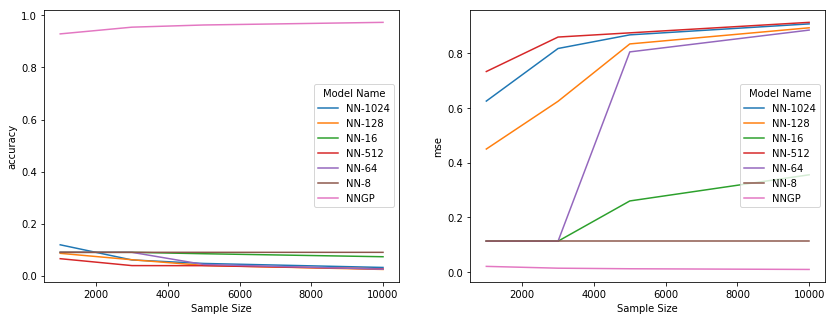

In [14]:
plt.figure(figsize = (14, 5))
ax1 = plt.subplot(121)
results_df.pivot(index='Sample Size', columns='Model Name', values='Accuracy').plot(ax=ax1)
plt.ylabel('accuracy')
ax2 = plt.subplot(122)
results_df.pivot(index='Sample Size', columns='Model Name', values='MSE').plot(ax=ax2)
plt.ylabel('mse')
plt.plot()